In [1]:
import jax
import numpyro
import numpyro.distributions as dist
import numpy as np
import matplotlib.pyplot as plt
from numpyro.infer import Hug, MCMC

In [2]:
def normal(D=2, mu=0, sigma=1):
    with numpyro.plate('D', D):
        theta = numpyro.sample('theta', dist.Normal(mu, sigma))

In [3]:
kernel = Hug(normal, step_size=1, trajectory_length=1)

mcmc = MCMC(kernel, num_warmup=0, num_samples=1000, num_chains=1)
rng_key = jax.random.PRNGKey(0)

mcmc.run(rng_key, D=2, mu=1, sigma=1, extra_fields=('potential_energy','accept_prob'))

sample: 100%|██████████| 1000/1000 [00:00<00:00, 1157.70it/s]


In [4]:
samples = mcmc.get_samples()
samples

{'theta': DeviceArray([[ 0.9810951 , -0.46085095],
              [ 0.33209884, -0.2993654 ],
              [-0.00950778, -0.05609453],
              ...,
              [ 0.06167316, -0.11981285],
              [-0.38647294,  0.53942394],
              [ 1.8036995 , -0.22004265]], dtype=float32)}

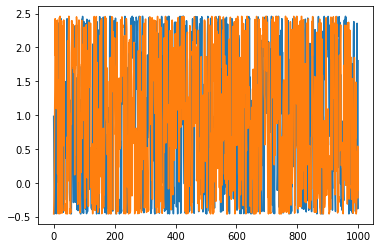

In [5]:
plt.plot(samples["theta"])

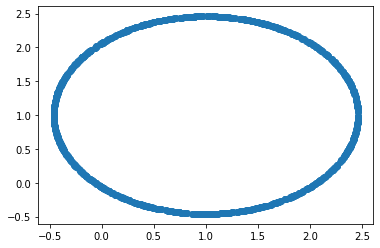

In [6]:
plt.scatter(x=samples["theta"][:,0], y=samples["theta"][:,1])

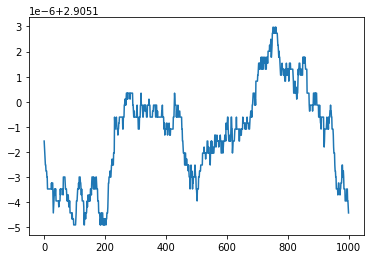

In [7]:
pe, ap = [mcmc.get_extra_fields()[k] for k in ('potential_energy','accept_prob')]
plt.plot(pe)

(0.0, 1.01)

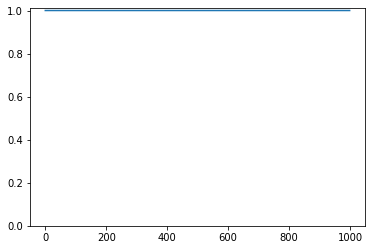

In [9]:
plt.plot(ap)
plt.ylim(0,1.01)